<a href="https://colab.research.google.com/github/kristoowae/Portofolio-Google_Notebook/blob/main/Clustering_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Koleksi Data & 2. Preprocessing Data

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Live.csv to Live.csv


In [ ]:
# Memuat dataset dari file CSV
try:
    df = pd.read_csv('Live.csv')
except FileNotFoundError:
    print("File 'Live.csv' tidak ditemukan. Pastikan file berada di direktori yang benar.")
    exit()

In [ ]:
# Menampilkan 5 baris pertama dari data untuk inspeksi awal
print("### 5 Baris Pertama Data Awal:")
print(df.head())

# Menampilkan informasi ringkas tentang dataset, termasuk tipe data dan nilai non-null
print("\n### Informasi Dataset:")
df.info()

# Memeriksa jumlah nilai yang hilang (missing values) per kolom
print("\n### Jumlah Nilai yang Hilang Sebelum Pembersihan:")
print(df.isnull().sum())

# Print the column names to see what's actually in the DataFrame
print("\n### Nama Kolom dalam DataFrame:")
print(df.columns)

# Identify columns that are completely empty (all values are NaN)
empty_cols = df.columns[df.isnull().all()]

# Drop the empty columns
if not empty_cols.empty:
    print(f"\n### Menghapus Kolom yang Sepenuhnya Kosong: {empty_cols.tolist()}")
    df.drop(columns=empty_cols, inplace=True)
else:
    print("\n### Tidak ada kolom yang sepenuhnya kosong.")

# Menghapus baris yang memiliki nilai kosong
df.dropna(inplace=True)

# Memeriksa kembali nilai yang hilang untuk memastikan data sudah bersih
print("\n### Jumlah Nilai yang Hilang Setelah Pembersihan:")
print(df.isnull().sum())

# Mengubah tipe data kolom 'status_published' menjadi datetime untuk analisis berbasis waktu
df['status_published'] = pd.to_datetime(df['status_published'])

### 5 Baris Pertama Data Awal:
                          status_id status_type    status_published  \
0  246675545449582_1649696485147474       video 2018-04-22 06:00:00   
1  246675545449582_1649426988507757       photo 2018-04-21 22:45:00   
2  246675545449582_1648730588577397       video 2018-04-21 06:17:00   
3  246675545449582_1648576705259452       photo 2018-04-21 02:29:00   
4  246675545449582_1645700502213739       photo 2018-04-18 03:22:00   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  
0          1         1           0  

**1. Koleksi Data**

  Data yang digunakan adalah Live.csv yang berisi kumpulan data dari postingan Facebook. Dataset ini mencakup berbagai metrik seperti tipe status, waktu publikasi, dan jumlah reaksi (suka, cinta, wow, haha, sedih, marah), komentar, dan pembagian.

**2. Preprocessing Data**

  Proses preprocessing data ini dimulai dengan tahap inspeksi awal untuk memahami karakteristik dataset. Fungsi df.head() digunakan untuk menampilkan beberapa baris pertama, memberikan gambaran visual tentang struktur dan isi data, sementara df.info() menyajikan ringkasan teknis mengenai tipe data setiap kolom dan jumlah nilai non-null. Setelah data dipahami, langkah selanjutnya adalah pembersihan, yang diawali dengan mendeteksi jumlah nilai kosong per kolom menggunakan df.isnull().sum(). Kode secara cerdas mengidentifikasi dan menghapus kolom mana pun yang seluruhnya kosong, lalu melanjutkan dengan menghapus baris-baris yang masih mengandung nilai kosong menggunakan df.dropna(inplace=True). Sebuah pengecekan ulang dilakukan untuk memastikan dataset kini sepenuhnya bebas dari nilai yang hilang. Sebagai langkah final dalam persiapan data, kolom status_published yang awalnya berformat teks diubah menjadi tipe data datetime menggunakan pd.to_datetime(). Transformasi ini sangat krusial karena memungkinkan dilakukannya berbagai analisis berbasis waktu, seperti pengurutan kronologis atau ekstraksi komponen tanggal. Secara keseluruhan, alur kerja ini secara sistematis mengubah data mentah menjadi dataset yang bersih, konsisten, dan terstruktur dengan baik, sehingga siap untuk tahap analisis dan visualisasi selanjutnya.

# 3. Analisis Data

In [ ]:
# Menampilkan nilai unik pada kolom 'status_type'
print("\n### Tipe Status Unik:")
print(df['status_type'].unique())

# Menghitung korelasi antar fitur numerik
numerical_cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
correlation_matrix = df[numerical_cols].corr()

print("\n### Matriks Korelasi (5 Baris Pertama):")
print(correlation_matrix.head())



### Tipe Status Unik:
['video' 'photo' 'link' 'status']

### Matriks Korelasi (5 Baris Pertama):
               num_reactions  num_comments  num_shares  num_likes  num_loves  \
num_reactions       1.000000      0.150843    0.250723   0.994923   0.305003   
num_comments        0.150843      1.000000    0.640637   0.101687   0.521223   
num_shares          0.250723      0.640637    1.000000   0.172492   0.820000   
num_likes           0.994923      0.101687    0.172492   1.000000   0.209308   
num_loves           0.305003      0.521223    0.820000   0.209308   1.000000   

               num_wows  num_hahas  num_sads  num_angrys  
num_reactions  0.267752   0.176028  0.075138    0.124326  
num_comments   0.162394   0.325048  0.236453    0.225184  
num_shares     0.407628   0.399826  0.199970    0.312513  
num_likes      0.207800   0.120784  0.052169    0.087431  
num_loves      0.508798   0.507830  0.207600    0.371001  


**3. Analisis Data**

  Pada tahap ini, dilakukan analisis statistik deskriptif dan eksplorasi untuk memahami lebih dalam tentang data.

  - Analisis Tipe Status: Terdapat empat tipe status unik dalam dataset: 'video', 'photo', 'link', dan 'status'.
  - Analisis Korelasi: Matriks korelasi dihitung untuk fitur-fitur numerik untuk memahami hubungan di antara mereka. Sebagai contoh, num_reactions dan num_likes memiliki korelasi yang sangat tinggi, yang memang sudah diduga.

# 4. Visualisasi Hasil

<ipython-input-13-3356336496>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['status_type'], order=df['status_type'].value_counts().index, palette='viridis')


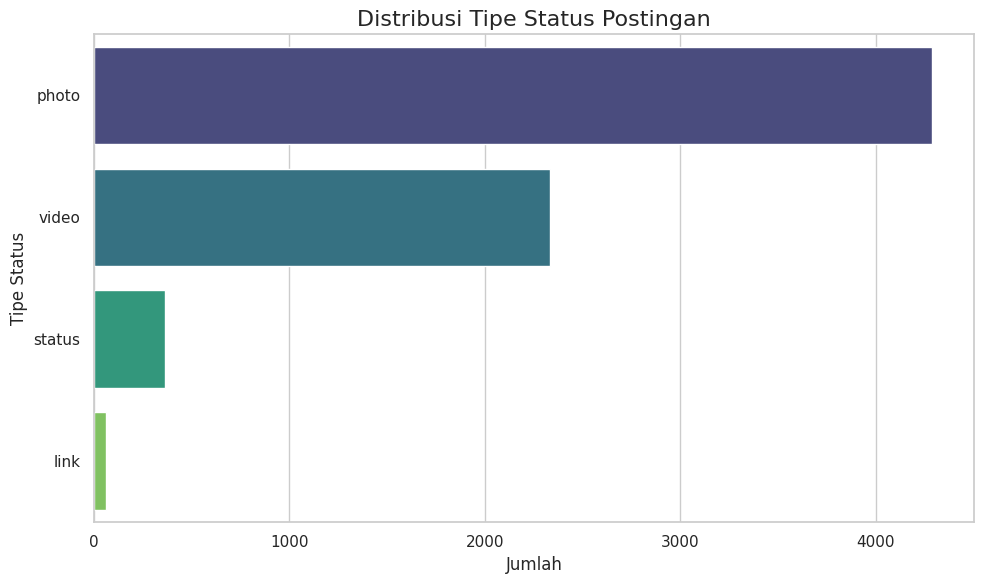

In [ ]:
# Mengatur gaya plot agar terlihat lebih menarik
sns.set(style="whitegrid")

# 1. Visualisasi Distribusi Tipe Status (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(y=df['status_type'], order=df['status_type'].value_counts().index, palette='viridis')
plt.title('Distribusi Tipe Status Postingan', fontsize=16)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Tipe Status', fontsize=12)
plt.tight_layout() # Menyesuaikan plot agar pas
plt.show()

**4. Visualisasi Hasil**

  Visualisasi data membantu dalam menyajikan temuan dari analisis secara lebih mudah dipahami. Berikut adalah beberapa visualisasi yang dihasilkan:

  **Distribusi Tipe Status**

  Grafik ini menunjukkan jumlah dari masing-masing tipe status. Terlihat bahwa status dengan tipe foto adalah yang paling umum, diikuti oleh video.

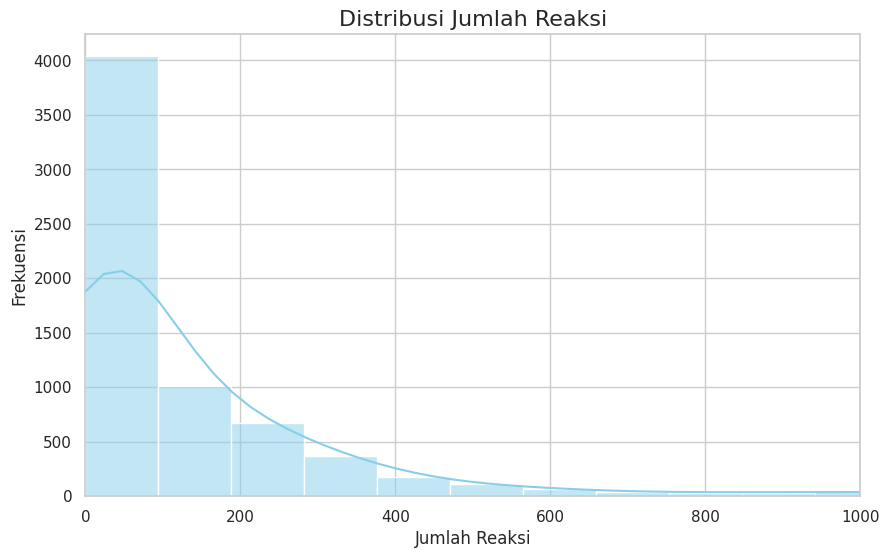

In [ ]:
# 2. Visualisasi Distribusi Jumlah Reaksi (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['num_reactions'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Reaksi', fontsize=16)
plt.xlabel('Jumlah Reaksi', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xlim(0, 1000)  # Memberi batas sumbu x untuk visibilitas yang lebih baik pada data mayoritas
plt.show()

**Distribusi Jumlah Reaksi**

Histogram ini menunjukkan distribusi dari jumlah reaksi. Sebagian besar postingan memiliki jumlah reaksi yang lebih rendah, dengan beberapa postingan memiliki jumlah reaksi yang sangat tinggi, yang menunjukkan distribusi yang right-skewed.

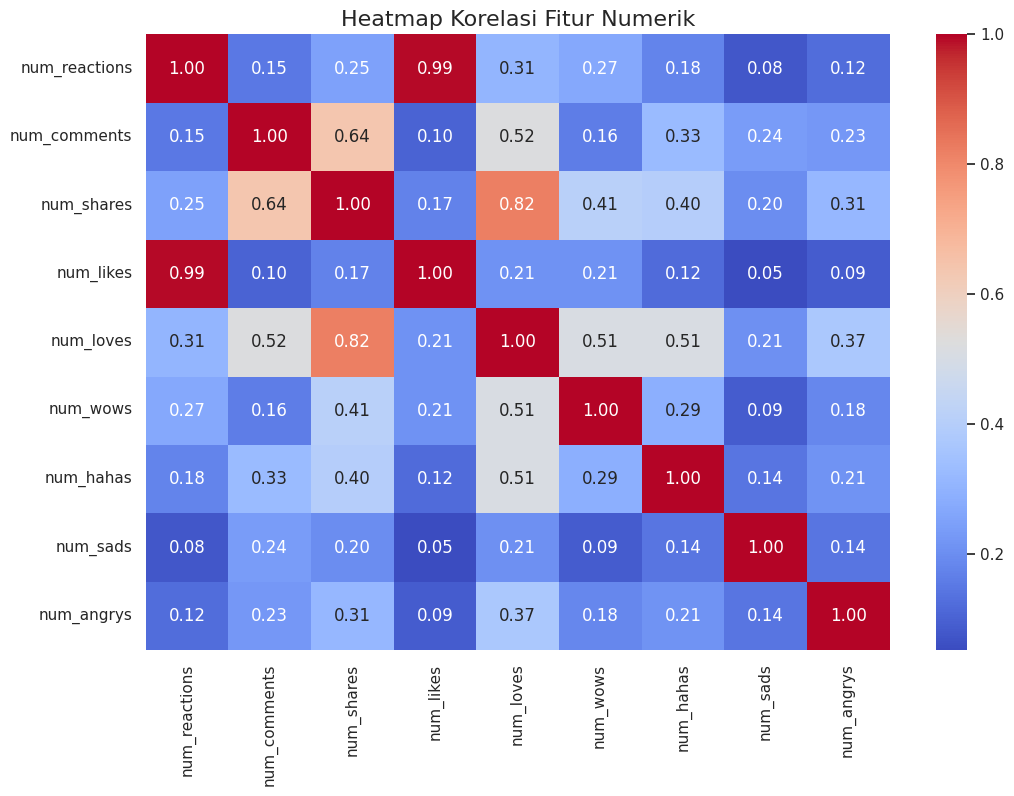

In [ ]:
# 3. Visualisasi Matriks Korelasi (Heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=16)
plt.show()

**Matriks Korelasi Fitur Numerik**

Heatmap ini menyajikan korelasi antar-variabel numerik. Warna yang lebih hangat (mendekati merah) menunjukkan korelasi positif yang lebih kuat, sementara warna yang lebih dingin (mendekati biru) menunjukkan korelasi negatif yang lebih kuat.

<ipython-input-16-258706909>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_type', y='num_reactions', data=df, palette='pastel')


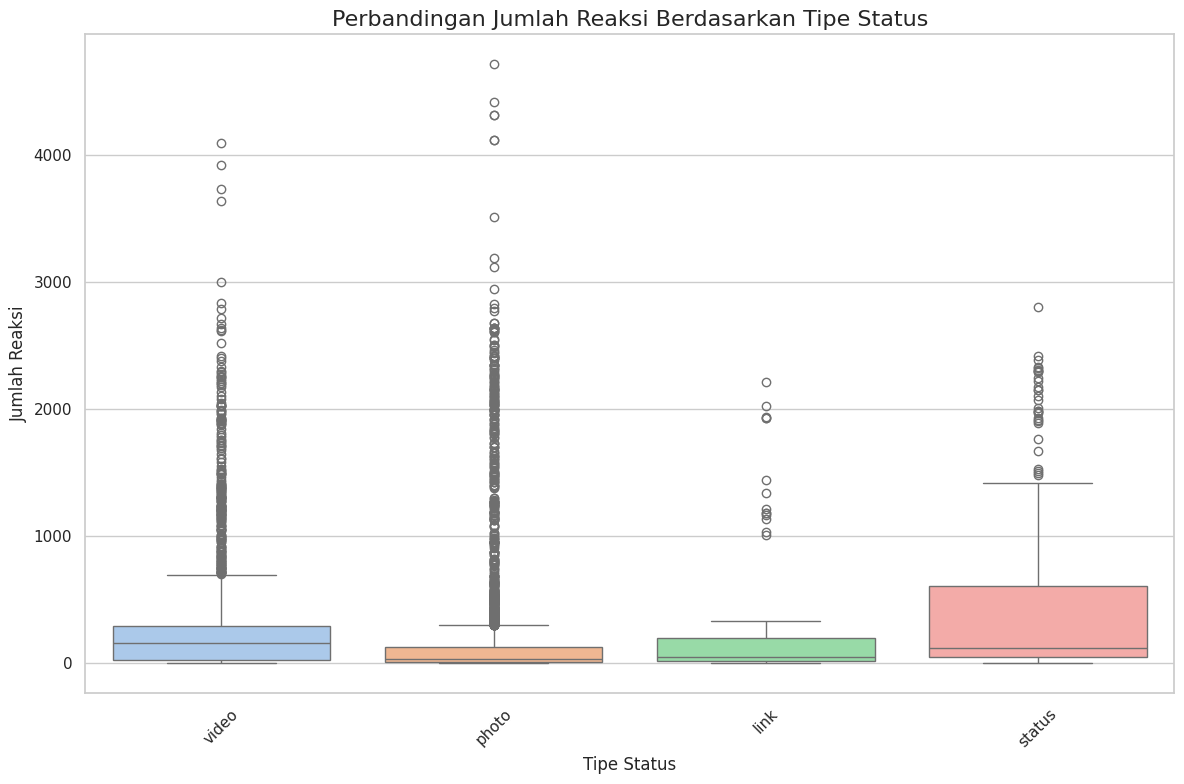

In [ ]:
# 4. Visualisasi Jumlah Reaksi Berdasarkan Tipe Status (Box Plot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='status_type', y='num_reactions', data=df, palette='pastel')
plt.title('Perbandingan Jumlah Reaksi Berdasarkan Tipe Status', fontsize=16)
plt.xlabel('Tipe Status', fontsize=12)
plt.ylabel('Jumlah Reaksi', fontsize=12)
plt.xticks(rotation=45) # Memutar label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()

**Jumlah Reaksi berdasarkan Tipe Status**

Box plot ini membandingkan distribusi jumlah reaksi untuk setiap tipe status. Terlihat bahwa status dengan tipe video cenderung mendapatkan jumlah reaksi yang lebih tinggi dan lebih bervariasi dibandingkan dengan tipe status lainnya.

**HASIL KESELURUHAN :**

Analisis ini memberikan wawasan awal tentang dataset Live.csv. Untuk analisis lebih lanjut, dapat dieksplorasi lebih dalam mengenai tren waktu, analisis sentimen dari komentar, atau membangun model prediktif untuk memprediksi keterlibatan pengguna.